In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bs_path import BSPath
from heston_path import HestonPath
from pricing import MonteCarlo

# Black-Scholes pricing

### Trajectory test

In [2]:
bs_model = BSPath(r=.03, sigma=.2, S0=100)
traj = bs_model.simulation(100, 1/100, 100)

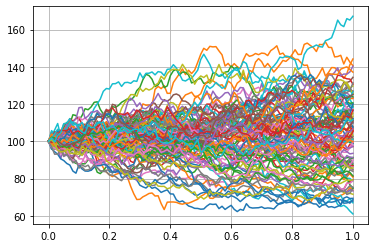

In [3]:
t = np.insert(traj, obj=0, values=100, axis=0)
plt.plot(np.arange(101)/100, t)
plt.grid();

### Autocallable pricing

In [4]:
autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)

In [5]:
bs_model = BSPath(r=.03, sigma=.4, S0=100)
traj = bs_model.simulation(4, 1/4, 10**5)

In [6]:
autocall.valuation(traj)

69.27% hit the barrier
Barrier breach at time:
- 0.25 years: 47.54% of the time
- 0.5 years: 11.95% of the time
- 0.75 years: 6.10% of the time
- 1.0 years: 3.68% of the time


(93.90785028694853, 0.1289551055200684)

### Variation with the spot

In [7]:
spots = np.linspace(1, 200, 100)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)
    bs_model = BSPath(r=.03, sigma=.4, S0=S0)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

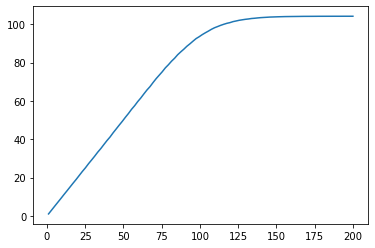

In [8]:
plt.plot(spots, prices[::, 0])

### Variation with the volatility

In [9]:
vols = np.linspace(.001, .5, 80)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.05, barrier=100, freq=.25, mat=1, notional=100)
    bs_model = BSPath(r=.03, sigma=v, S0=100)
    traj = bs_model.simulation(4, 1/4, 10**5)
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

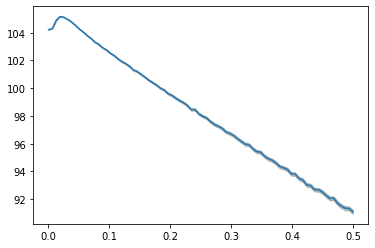

In [10]:
plt.fill_between(vols, prices[::, 0] - prices[::, 1], prices[::, 0] + prices[::, 1], color='tab:gray', alpha=.5)
plt.plot(vols, prices[::, 0])

# Heston pricing

### Trajectory test

In [49]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
traj = heston_model.simulation(100, 1/100, 100)

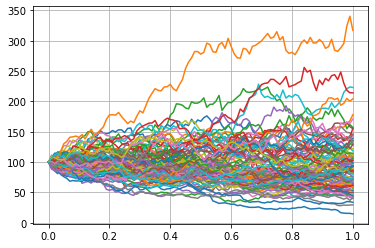

In [50]:
plt.plot(np.arange(101)/100, traj)
plt.grid();

### Autocallable pricing

In [51]:
autocall = MonteCarlo(rate=.03, q=0.06, barrier=100, freq=.25, mat=1, put_strike=90, notional=100)

In [54]:
heston_model = HestonPath(r=.03, S0=100, V0=.18, kappa=20, theta=.2, rho=-.6, sigmav=.3)
full_traj = heston_model.simulation(4, 1/4, 10**5)
traj = full_traj[1:, ::]

In [55]:
autocall.valuation(traj)

66.52% hit the barrier and the put is exercised 29.84% of the time
Barrier breach at time:
- 0.25 years: 51.01% of the time
- 0.5 years: 2.05% of the time
- 0.75 years: 13.00% of the time
- 1.0 years: 0.46% of the time


(92.76356528981252, 0.1606778432072839)

### Sensitivity with respect to the spot

In [58]:
spots = np.linspace(0.01, 200, 100)
prices = []
for S0 in spots:
    autocall = MonteCarlo(rate=.03, q=.1, barrier=100, freq=.25, mat=1, put_strike=90, notional=100)
    heston_model = HestonPath(r=.03, S0=S0, V0=.18, kappa=10, theta=.2, rho=-.6, sigmav=.3)
    full_traj = heston_model.simulation(4, 1/4, 10**5)
    traj = full_traj[1:, :]
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

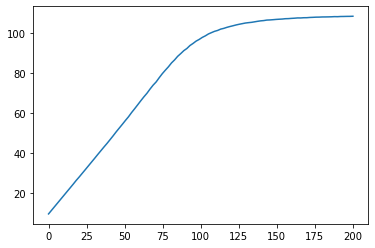

In [59]:
plt.plot(spots, prices[::, 0])

### Sensivity to volatility

In [60]:
vols = np.linspace(.001, .5, 80)
prices = []
for v in vols:
    autocall = MonteCarlo(rate=.03, q=0.1, barrier=100, freq=.25, mat=1, put_strike=70, notional=100)
    heston_model = HestonPath(r=.03, S0=100, V0=.2, kappa=10, theta=v, rho=-.6, sigmav=.3)
    full_traj = heston_model.simulation(4, 1/4, 10**5)
    traj = full_traj[1:, :]
    price = autocall.valuation(traj, verbose=False)
    prices.append(price)
prices = np.array(prices)

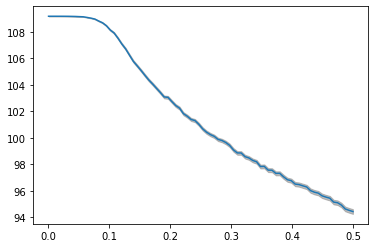

In [63]:
plt.fill_between(vols, prices[::, 0] - prices[::, 1], prices[::, 0] + prices[::, 1], color='tab:gray', alpha=.5)
plt.plot(vols, prices[::, 0])